/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Classification report for SVM Classifier:
              precision    recall  f1-score   support

           0       0.74      0.82      0.78      2097
           1       0.95      0.96      0.95      2087
           2       0.72      0.77      0.74      2075
           3       0.84      0.82      0.83      2110
           4       0.75      0.75      0.75      2075
           5       0.92      0.92      0.92      2131
           6       0.64      0.56      0.59      2090
           7       0.90      0.92      0.91      2103
           8       0.95      0.91      0.93      2092
           9       0.94      0.93      0.93      2140

    accuracy                           0.84     21000
   macro avg       0.84      0.84      0.84     21000
weighted avg       0.84      0.84      0.84     21000


Confusion Matrix:
 [[1724   11   44   80    8    1  208    0   21    0]
 [  14 2001    7   52    1    1    9    0    2    0]
 [  48    8 1604   22  228    0  158    0    7    0]
 [ 126   71   45 173

<Figure size 1000x800 with 0 Axes>

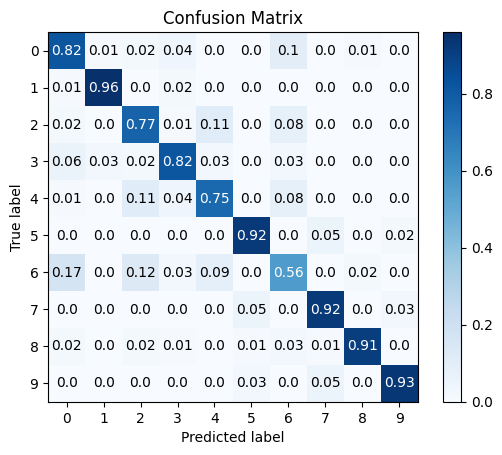

NameError: name 'train_index' is not defined

In [1]:
!pip install scikit-plot
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize
import scikitplot as skplt

# Load the Fashion MNIST dataset
fashion_mnist = datasets.fetch_openml('Fashion-MNIST', version=1)

# Preprocess data
X = fashion_mnist.data
y = fashion_mnist.target.astype(int)

# Binarize the labels for ROC curve
y_bin = label_binarize(y, classes=np.arange(10))

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.75, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Train SVM model
svm_model = svm.SVC(kernel='linear', probability=True)
svm_model.fit(X_train, y_train)

# Predict on the test set
y_pred = svm_model.predict(X_test)

# Performance metrics
print("Classification report for SVM Classifier:\n%s\n"
      % (metrics.classification_report(y_test, y_pred)))

# Confusion Matrix
cm = metrics.confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Plotting Confusion Matrix
plt.figure(figsize=(10, 8))
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)
plt.title('Confusion Matrix')
plt.show()

# ROC and AUC
# Compute ROC curve and ROC area for each class
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True))
y_score = classifier.fit(X_train, y_bin[train_index]).predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_bin[test_index].ravel(), y_score.ravel())
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
